100%|██████████| 170M/170M [00:05<00:00, 29.9MB/s]



Resize
 Image 1: shape=(64, 64, 3), range=(1, 252)
 Image 2: shape=(64, 64, 3), range=(5, 252)

Grayscale
 Image 1: shape=(64, 64), range=(6, 248)
 Image 2: shape=(64, 64), range=(6, 252)

Horizontal Flip
 Image 1: shape=(64, 64), range=(6, 248)
 Image 2: shape=(64, 64), range=(6, 252)

Rotation
 Image 1: shape=(64, 64), range=(0, 247)
 Image 2: shape=(64, 64), range=(0, 252)

Normalization
 Image 1: shape=(64, 64), range=(0.0, 0.9686274528503418)
 Image 2: shape=(64, 64), range=(0.0, 0.9882352948188782)

Sharpening Filter
 Image 1: shape=(64, 64), range=(-1.2588236331939697, 1.5803922414779663)
 Image 2: shape=(64, 64), range=(-1.003921627998352, 1.756862759590149)


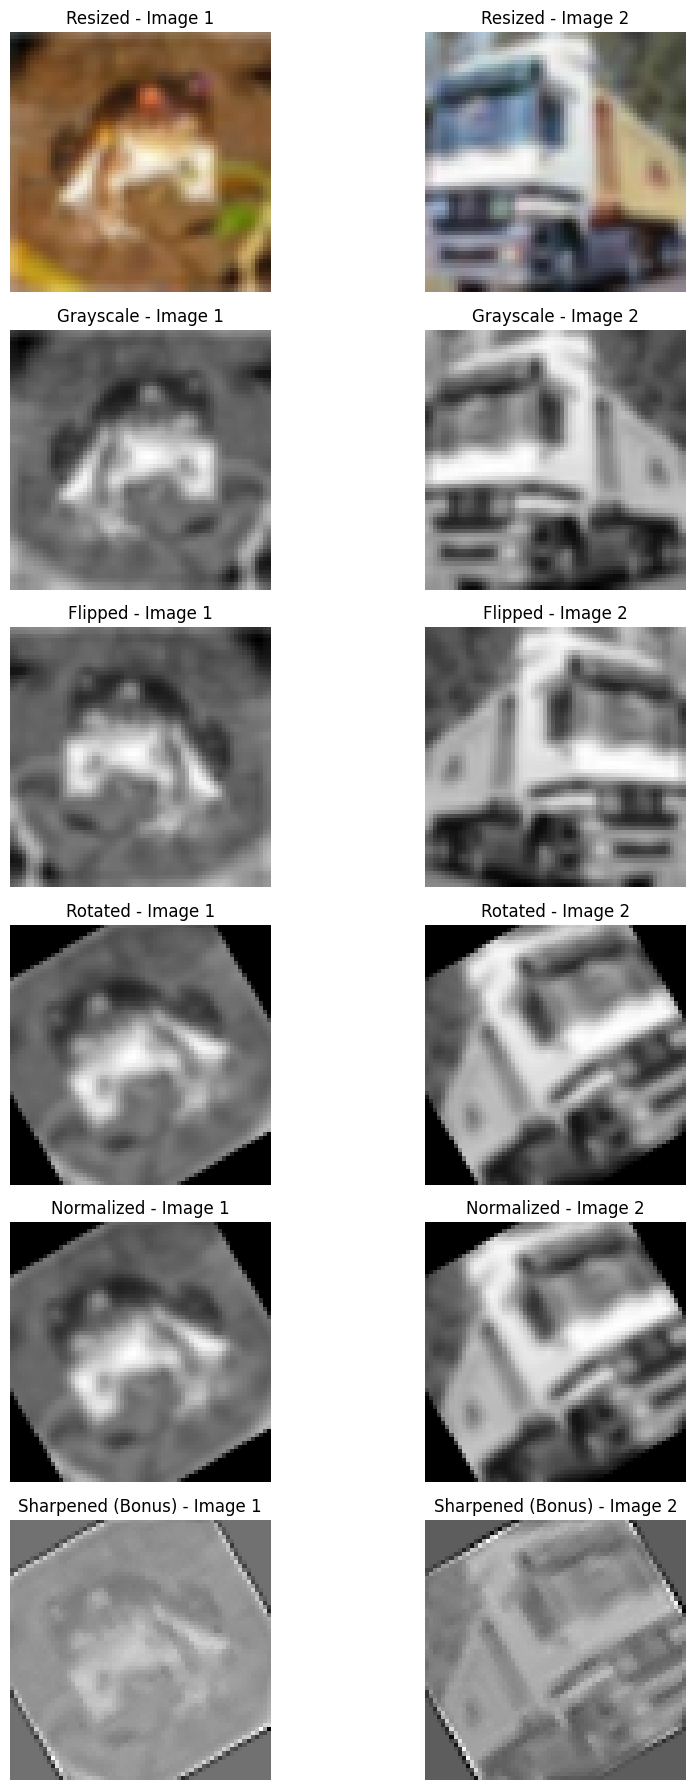


Final Tensor Shape: torch.Size([2, 1, 64, 64])
Final Tensor Range: -1.2588236331939697 1.756862759590149


In [1]:
import torch
import torchvision
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
import cv2

# -------------------------------
# Load CIFAR-10 Dataset
# -------------------------------
dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=True,
    download=True
)

# Select two images
img1, _ = dataset[0]
img2, _ = dataset[1]

images = [np.array(img1), np.array(img2)]

# -------------------------------
# Utility Functions
# -------------------------------
def print_stats(name, imgs):
    print(f"\n{name}")
    for i, img in enumerate(imgs):
        print(f" Image {i+1}: shape={img.shape}, range=({img.min()}, {img.max()})")

def show_step(title, imgs, step_idx):
    for i, img in enumerate(imgs):
        plt.subplot(len(steps), 2, step_idx*2 + i + 1)
        if img.ndim == 2:
            plt.imshow(img, cmap="gray")
        else:
            plt.imshow(img)
        plt.axis("off")
        plt.title(f"{title} - Image {i+1}")

# -------------------------------
# Preprocessing Steps
# -------------------------------
steps = []

# 1. Resize
resize = T.Resize((64, 64))
resized = [np.array(resize(T.ToPILImage()(img))) for img in images]
steps.append(("Resized", resized))
print_stats("Resize", resized)

# 2. Grayscale
grayscale = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in resized]
steps.append(("Grayscale", grayscale))
print_stats("Grayscale", grayscale)

# 3. Horizontal Flip
flipped = [cv2.flip(img, 1) for img in grayscale]
steps.append(("Flipped", flipped))
print_stats("Horizontal Flip", flipped)

# 4. Rotation
rotated = [
    cv2.warpAffine(
        img,
        cv2.getRotationMatrix2D((32, 32), 30, 1),
        (64, 64)
    )
    for img in flipped
]
steps.append(("Rotated", rotated))
print_stats("Rotation", rotated)

# 5. Normalization
normalized = [(img / 255.0).astype(np.float32) for img in rotated]
steps.append(("Normalized", normalized))
print_stats("Normalization", normalized)

# -------------------------------
# BONUS: Custom Sharpening Filter
# -------------------------------
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharpened = [cv2.filter2D(img, -1, kernel) for img in normalized]
steps.append(("Sharpened (Bonus)", sharpened))
print_stats("Sharpening Filter", sharpened)

# -------------------------------
# Visualization (Single Figure)
# -------------------------------
plt.figure(figsize=(10, 18))

for idx, (name, imgs) in enumerate(steps):
    show_step(name, imgs, idx)

plt.tight_layout()
plt.show()

# -------------------------------
# Convert to Tensor [B, C, H, W]
# -------------------------------
final_images = np.stack(sharpened)      # [B, H, W]
final_images = final_images[:, None, :, :]  # Add channel dim

tensor_output = torch.tensor(final_images)

print("\nFinal Tensor Shape:", tensor_output.shape)
print("Final Tensor Range:", tensor_output.min().item(), tensor_output.max().item())
